In [72]:
import pandas as pd # Import Necessary Libraries
import numpy as ny
import statistics
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Load in Marquette Dataset-- G.L for Game Log
gl = pd.read_csv('marquette.csv')
gl.head()
# clean dataset: don't need unnamed 2 column or unnamed 23 column (mostly or all NaN)
print(gl.columns)
gl = gl.drop("Unnamed: 2", axis='columns')
gl = gl.drop("Unnamed: 23", axis='columns')
gl.head()
# change column names
gl.rename(columns={'Unnamed: 0':'GameID','Unnamed: 1':'Date','Unnamed: 3':'Opp','Unnamed: 4':'W/L','Unnamed: 5':'Points Scored','Unnamed: 6':'Opp Points'},inplace=True)
gl.rename(columns={'School':'MU_FGM','School.1':'MU_FGA','School.2':'MU_FG_PCT','School.3':'MU_3PM','School.4':'MU_3PA','School.5':'MU_3PCT','School.6':'MU_FTM','School.7':'MU_FTA','School.8':'MU_FT_PCT',
                   'School.9':'MU_OFF_RB','School.10':'MU_TRB','School.11':'MU_AST','School.12':'MU_STL','School.13':'MU_BLK','School.14':'MU_TOV','School.15':'MU_PF'},inplace=True)
gl.rename(columns={'Opponent':'Opp_FGM','Opponent.1':'Opp_FGA','Opponent.2':'Opp_FG_PCT','Opponent.3':'Opp_3PM','Opponent.4':'Opp_3PA','Opponent.5':'Opp_3PCT','Opponent.6':'Opp_FTM','Opponent.7':'Opp_FTA','Opponent.8':'Opp_FT_PCT',
                   'Opponent.9':'Opp_OFF_RB','Opponent.10':'Opp_TRB','Opponent.11':'Opp_AST','Opponent.12':'Opp_STL','Opponent.13':'Opp_BLK','Opponent.14':'Opp_TOV','Opponent.15':'Opp_PF'},inplace=True)
print(gl.columns)
# delete top row
gl = gl.iloc[1:]
gl.head(7)

# change all columns except date, opp, and w/l to numerics
numerics = gl.columns.drop({'Date','Opp','W/L'})
gl[numerics] = gl[numerics].apply(pd.to_numeric)
gl.info()

# replace W and L with 0 and 1
gl['W/L'] = gl.get('W/L').replace('L',1)
gl['W/L'] = gl.get('W/L').replace('W',0)
gl['W/L'] = gl.get('W/L').replace('W (1 OT)',0)
gl.get('W/L').unique()




Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'School', 'School.1', 'School.2',
       'School.3', 'School.4', 'School.5', 'School.6', 'School.7', 'School.8',
       'School.9', 'School.10', 'School.11', 'School.12', 'School.13',
       'School.14', 'School.15', 'Unnamed: 23', 'Opponent', 'Opponent.1',
       'Opponent.2', 'Opponent.3', 'Opponent.4', 'Opponent.5', 'Opponent.6',
       'Opponent.7', 'Opponent.8', 'Opponent.9', 'Opponent.10', 'Opponent.11',
       'Opponent.12', 'Opponent.13', 'Opponent.14', 'Opponent.15'],
      dtype='object')
Index(['GameID', 'Date', 'Opp', 'W/L', 'Points Scored', 'Opp Points', 'MU_FGM',
       'MU_FGA', 'MU_FG_PCT', 'MU_3PM', 'MU_3PA', 'MU_3PCT', 'MU_FTM',
       'MU_FTA', 'MU_FT_PCT', 'MU_OFF_RB', 'MU_TRB', 'MU_AST', 'MU_STL',
       'MU_BLK', 'MU_TOV', 'MU_PF', 'Opp_FGM', 'Opp_FGA', 'Opp_FG_PCT',
       'Opp_3PM', 'Opp_3PA', 'Opp_3PCT', 'Opp_FTM', 'Opp_FTA', 'Opp_FT_PCT',
       'Opp

array([0, 1], dtype=int64)

In [73]:
scaler = StandardScaler()
gl[numerics] = scaler.fit_transform(gl[numerics])
gl = gl.drop(columns = ["GameID", "Opp", "Date"])

df_win = gl[gl["W/L"] == 0]
df_loss = gl[gl["W/L"] == 1]
df_win
df_loss

,W/L,Points Scored,Opp Points,MU_FGM,MU_FGA,MU_FG_PCT,MU_3PM,MU_3PA,MU_3PCT,MU_FTM,...,Opp_FTM,Opp_FTA,Opp_FT_PCT,Opp_OFF_RB,Opp_TRB,Opp_AST,Opp_STL,Opp_BLK,Opp_TOV,Opp_PF
6,1,-0.258918,1.025018,0.168021,-0.567071,0.507501,-1.211950,-1.342441,-0.633901,-0.208733,...,-0.701711,-0.113119,-1.388122,0.240805,-0.149618,-0.176160,-1.254517,-0.566479,0.132457,-1.135302
8,1,-1.191483,0.649517,-1.191901,-1.139296,-0.789760,-0.580370,0.651017,-1.181514,0.011928,...,2.308528,2.063285,0.810426,0.780793,0.023378,-1.340073,0.137997,-1.090472,-0.444121,-0.503630
12,1,-1.784933,0.274015,-2.163274,-0.948554,-2.060813,-1.527740,-0.844077,-1.605139,1.335892,...,0.991548,2.063285,-0.885985,-0.839170,0.542364,0.522188,-0.326174,-1.090472,-0.155832,1.075549
15,1,-0.258918,1.025018,-0.220528,0.768123,-0.619413,0.366999,0.484895,0.017034,-0.429394,...,0.427128,0.054297,0.932567,1.050787,1.580337,0.522188,0.137997,1.005500,1.573904,-0.187794
16,1,-1.361040,-0.101487,-0.997626,2.294058,-1.955984,-1.211950,0.983260,-2.008099,-0.429394,...,-0.137291,-0.113119,-0.030994,-1.109164,0.888355,0.754971,0.137997,-0.566479,1.285615,0.443877
25,1,-2.124047,1.400520,-1.580450,-0.757813,-1.444942,-1.211950,-0.345712,-1.429490,-1.091376,...,0.050849,-0.280534,0.810426,1.590775,1.061350,2.151667,2.458852,0.481507,-0.732411,-0.819466
29,1,-0.258918,2.401858,0.168021,0.577381,-0.121474,0.051209,0.651017,-0.468584,-1.091376,...,-0.325431,-0.615366,0.647570,-0.839170,0.023378,0.987754,-0.326174,1.529493,-2.173857,-1.451138
30,1,-0.937147,0.524349,-0.609077,-0.185587,-0.593205,-0.896160,-1.508563,0.203016,-0.429394,...,-0.889851,-0.615366,-1.048840,1.590775,1.753332,0.754971,1.066339,2.053487,-0.732411,0.443877
34,1,-1.784933,0.399182,-1.580450,-1.330038,-1.169766,-0.896160,-1.176320,-0.230941,-0.429394,...,0.427128,0.221713,0.586499,-0.569176,0.715360,1.453319,-0.326174,1.005500,-1.597279,-0.503630
37,1,-1.700154,-0.351821,-1.774725,-0.185587,-1.903570,-1.527740,0.983260,-2.338733,0.673910,...,-1.077991,-0.615366,-1.612048,-0.839170,0.715360,-0.176160,0.137997,-0.042486,-0.444121,0.443877


ValueError: 'c' argument has 37 elements, which is inconsistent with 'x' and 'y' with size 27.

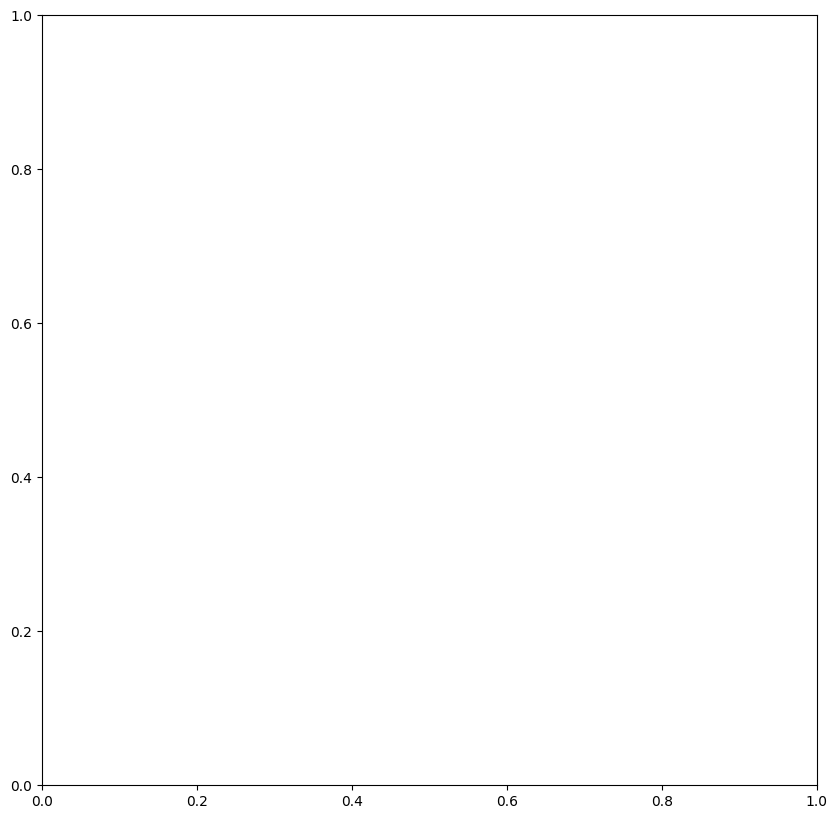

In [ ]:
#pca = PCA(n_components = 2)
#reduced_form = pca.fit_transform(df_win)
#kmeans = KMeans(n_clusters=5, random_state = 23)
#kmeans.fit(gl)

#plt.figure(figsize = (10,10))
#plt.scatter(reduced_form[:, 0], reduced_form[:,1], c = kmeans.labels_, cmap = 'viridus', s=50)
#plt.show